In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data

train = pd.read_csv('train_data.csv',header=0,names=col_names)
test = pd.read_csv('test_data.csv',header=0, names=col_names)
y_test = pd.read_csv('RUL_forecast_length.csv',header=0,names=['RUL','ID'])

# inspect first few rows
y_test = y_test['RUL']
train

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,50,194,0.0037,0.0004,100.0,518.67,643.77,1604.93,1423.51,14.62,...,519.85,2388.19,8194.20,8.5043,0.03,396,2388,100.0,38.42,23.0543
9905,50,195,0.0019,-0.0004,100.0,518.67,643.33,1605.31,1434.87,14.62,...,519.33,2388.21,8200.90,8.5352,0.03,395,2388,100.0,38.45,23.0191
9906,50,196,0.0020,-0.0002,100.0,518.67,643.32,1602.26,1430.01,14.62,...,519.88,2388.17,8194.10,8.5034,0.03,395,2388,100.0,38.45,23.0379
9907,50,197,-0.0026,-0.0001,100.0,518.67,643.73,1599.94,1432.87,14.62,...,519.48,2388.20,8194.64,8.5241,0.03,397,2388,100.0,38.52,23.0832


In [3]:
sensor_data = test.drop(['unit_nr', 'time_cycles','setting_1','setting_2','setting_3'],axis=1)
sensor_data["RUL"] = y_test
sensor_data

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,518.67,641.83,1583.55,1408.68,14.62,21.61,553.56,2387.98,9065.98,1.3,...,2387.99,8149.56,8.3884,0.03,391,2388,100.0,39.08,23.3214,86.0
1,518.67,642.09,1580.84,1397.69,14.62,21.61,553.74,2387.97,9060.95,1.3,...,2387.98,8145.73,8.3922,0.03,391,2388,100.0,38.83,23.3451,86.0
2,518.67,642.49,1591.56,1398.40,14.62,21.60,553.80,2387.98,9064.23,1.3,...,2388.00,8142.38,8.4018,0.03,392,2388,100.0,39.18,23.3495,78.0
3,518.67,642.42,1573.22,1397.74,14.62,21.61,554.93,2388.07,9072.70,1.3,...,2387.99,8148.23,8.3900,0.03,393,2388,100.0,38.89,23.4847,103.0
4,518.67,642.08,1587.52,1388.02,14.62,21.61,553.90,2387.99,9062.93,1.3,...,2388.02,8147.25,8.4024,0.03,391,2388,100.0,39.05,23.4072,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,518.67,642.36,1591.22,1407.75,14.62,21.61,553.40,2388.11,9071.17,1.3,...,2388.07,8145.15,8.4126,0.03,392,2388,100.0,39.05,23.3016,NaN
6408,518.67,642.77,1590.85,1412.00,14.62,21.61,552.79,2388.10,9060.40,1.3,...,2388.13,8143.03,8.4345,0.03,394,2388,100.0,38.79,23.3007,NaN
6409,518.67,642.21,1586.56,1405.31,14.62,21.61,553.25,2388.09,9067.24,1.3,...,2388.09,8139.82,8.4590,0.03,393,2388,100.0,38.81,23.2483,NaN
6410,518.67,642.57,1588.46,1405.24,14.62,21.61,553.85,2388.13,9066.63,1.3,...,2388.07,8146.76,8.4512,0.03,394,2388,100.0,38.77,23.2437,NaN


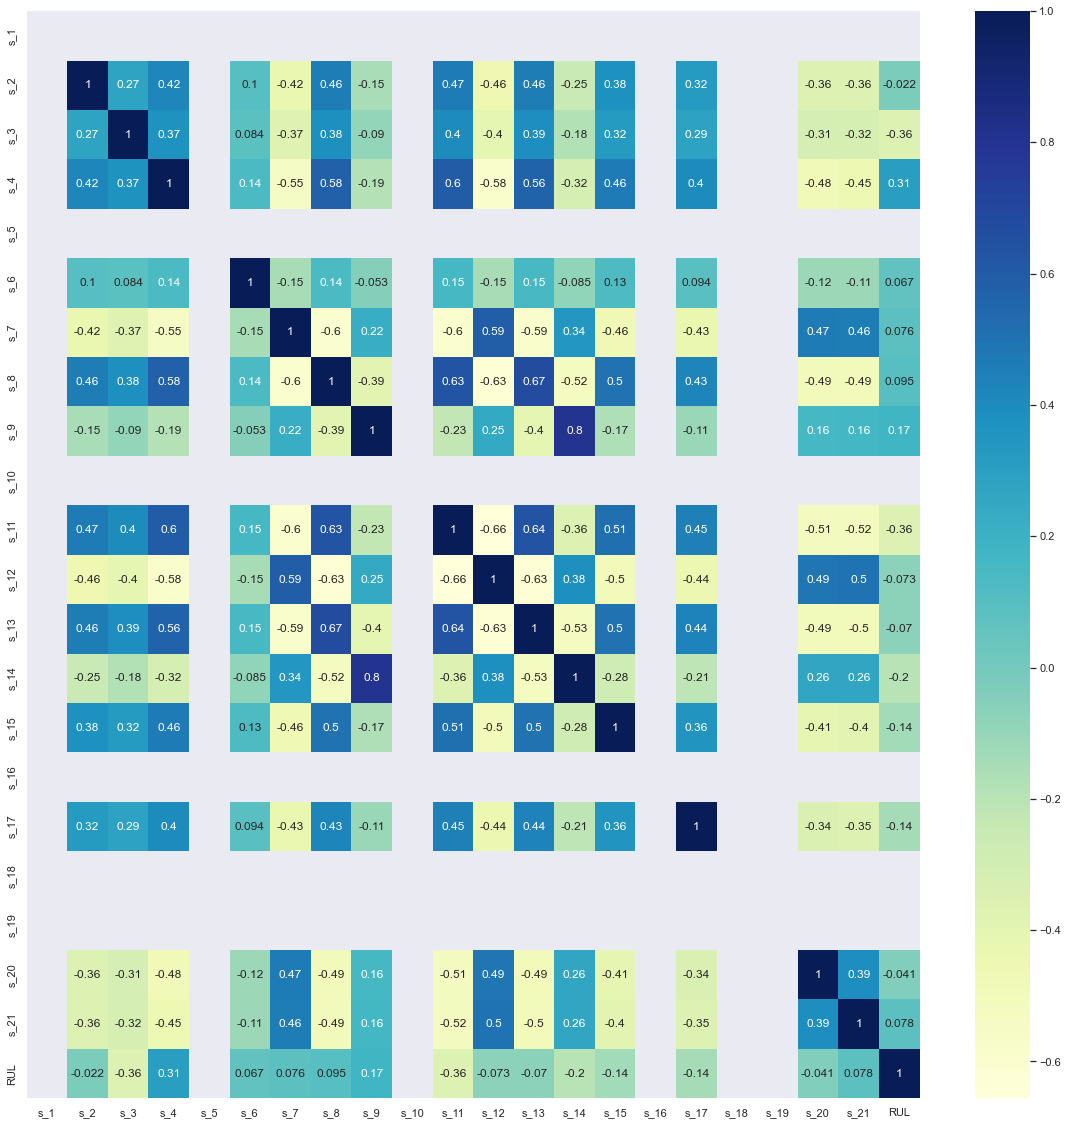

In [4]:
sensor_data.corr
plt.figure(figsize=(20,20))
sns.heatmap(sensor_data.corr(), annot=True,cmap="YlGnBu")
plt.show()

In [5]:

#sns.pairplot(data = sensor_data)

In [6]:
train[index_names].describe()
train[index_names].groupby('unit_nr').max().describe()

,time_cycles
count,50.000000
mean,198.180000
std,34.455348
min,128.000000
25%,172.250000
50%,195.000000
75%,214.750000
max,287.000000


In [7]:
train[setting_names].describe()

,setting_1,setting_2,setting_3
count,9909.000000,9909.000000,9909.0
mean,0.000030,0.000003,100.0
std,0.002192,0.000294,0.0
min,-0.008600,-0.000600,100.0
25%,-0.001400,-0.000300,100.0
50%,0.000100,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008300,0.000600,100.0


In [8]:
train[sensor_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,9909.0,518.670000,5.548198e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,9909.0,642.671038,5.094671e-01,641.2500,642.3000,642.6400,643.0000,644.5300
s_3,9909.0,1590.370340,6.187496e+00,1571.0400,1585.9700,1589.9500,1594.2800,1614.9300
s_4,9909.0,1408.653912,9.129158e+00,1386.4300,1401.8300,1407.7000,1414.4700,1441.4900
s_5,9909.0,14.620000,2.032255e-12,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,9909.0,21.609765,1.515368e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,9909.0,553.400091,9.055321e-01,549.8500,552.8200,553.4700,554.0700,556.0600
s_8,9909.0,2388.093514,7.305439e-02,2387.9000,2388.0400,2388.0900,2388.1400,2388.5200
s_9,9909.0,9066.053753,2.316894e+01,9021.7300,9052.6600,9060.9900,9070.8900,9239.7600
s_10,9909.0,1.300000,1.834181e-13,1.3000,1.3000,1.3000,1.3000,1.3000


In [9]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
  
train = add_remaining_useful_life(train)
train[index_names+['RUL']].head(10)

,unit_nr,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187
5,1,6,186
6,1,7,185
7,1,8,184
8,1,9,183
9,1,10,182


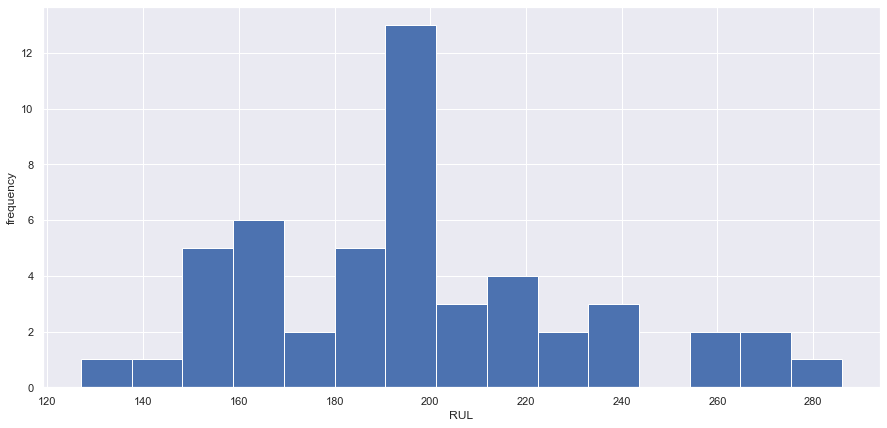

In [10]:
df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

In [11]:
train

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,50,194,0.0037,0.0004,100.0,518.67,643.77,1604.93,1423.51,14.62,...,2388.19,8194.20,8.5043,0.03,396,2388,100.0,38.42,23.0543,4
9905,50,195,0.0019,-0.0004,100.0,518.67,643.33,1605.31,1434.87,14.62,...,2388.21,8200.90,8.5352,0.03,395,2388,100.0,38.45,23.0191,3
9906,50,196,0.0020,-0.0002,100.0,518.67,643.32,1602.26,1430.01,14.62,...,2388.17,8194.10,8.5034,0.03,395,2388,100.0,38.45,23.0379,2
9907,50,197,-0.0026,-0.0001,100.0,518.67,643.73,1599.94,1432.87,14.62,...,2388.20,8194.64,8.5241,0.03,397,2388,100.0,38.52,23.0832,1


In [12]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name, 
                     data=train[train['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

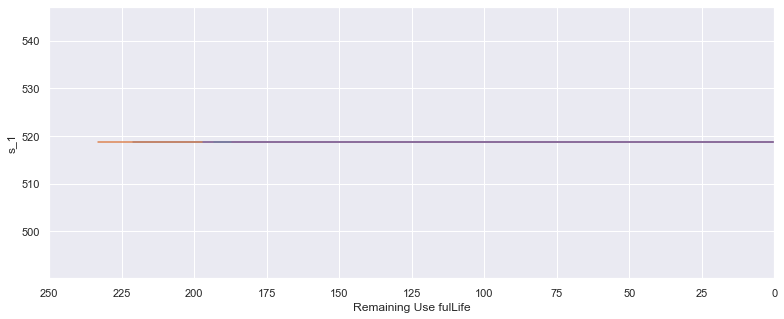

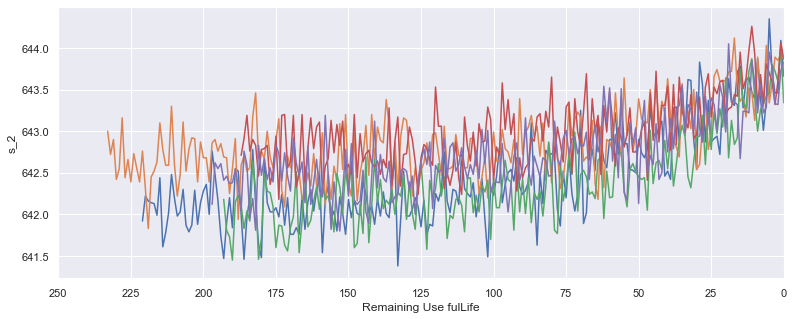

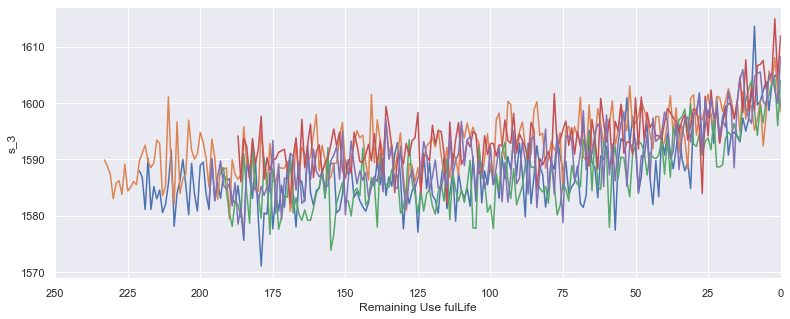

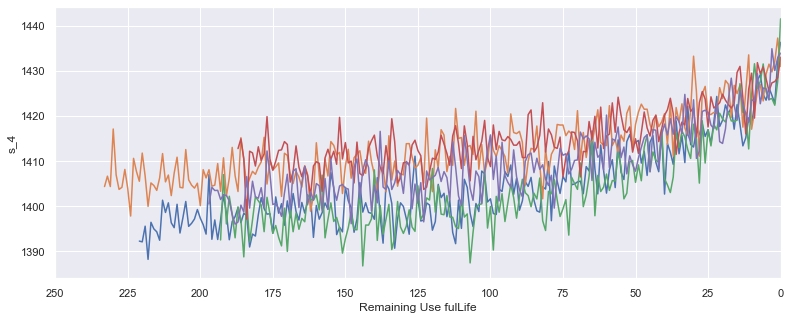

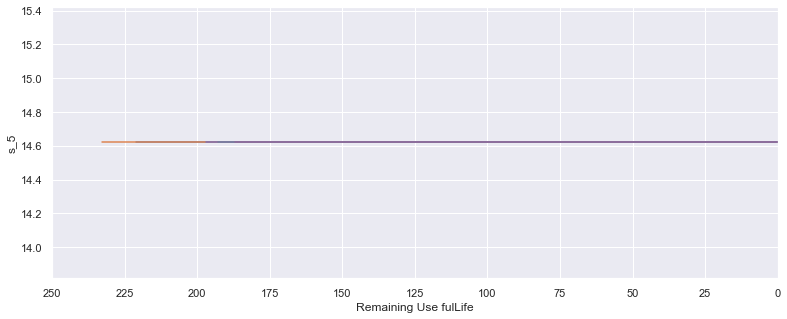

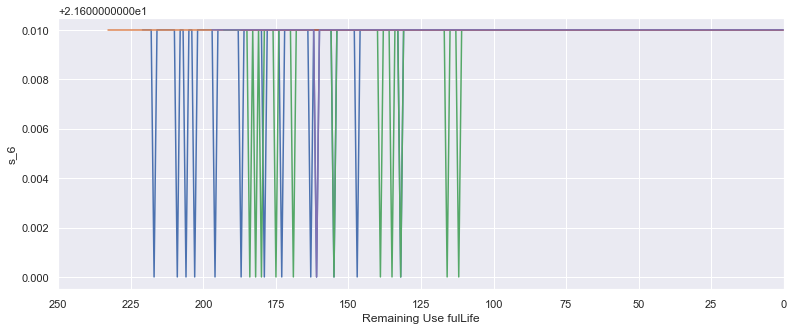

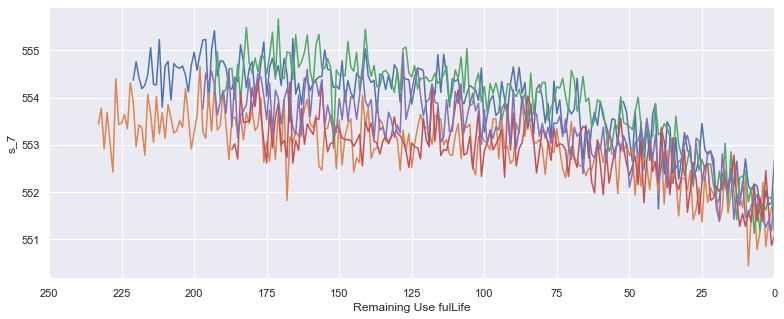

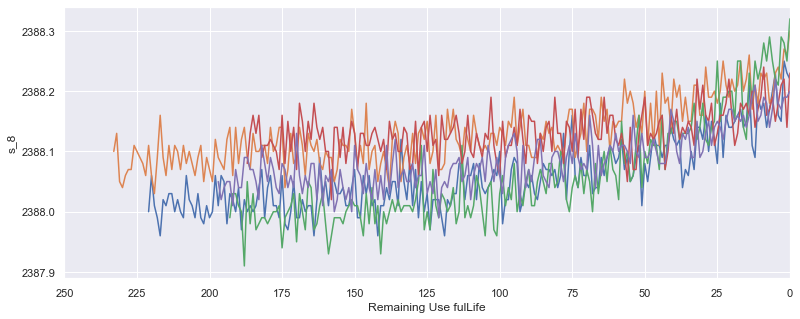

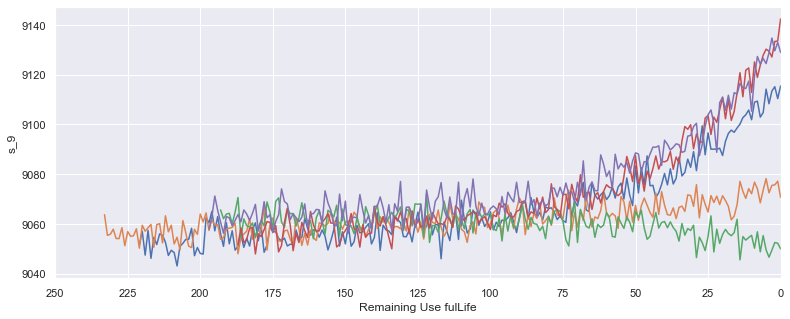

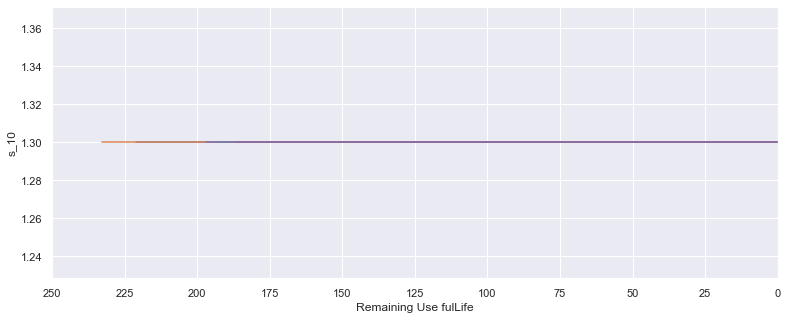

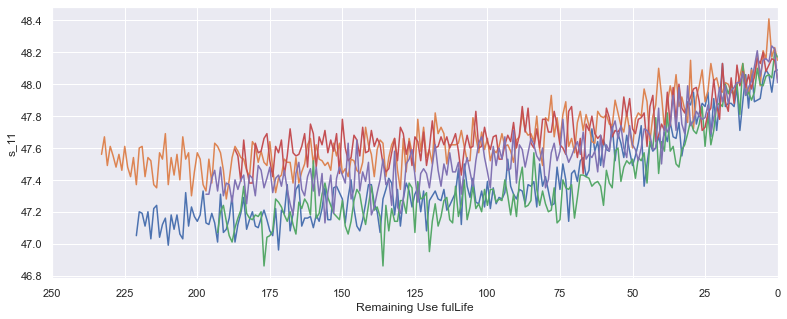

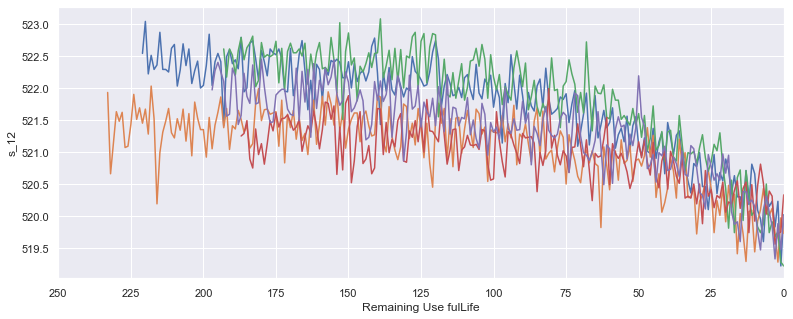

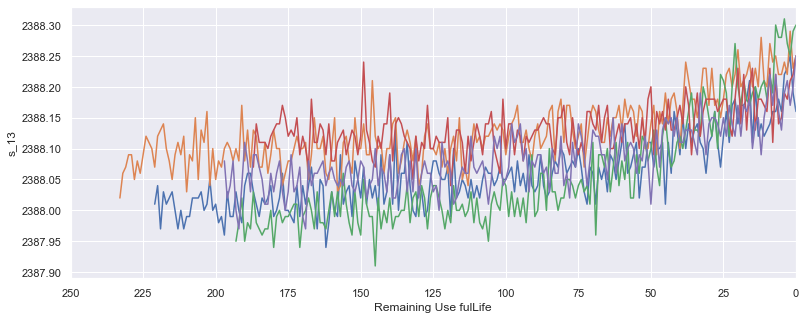

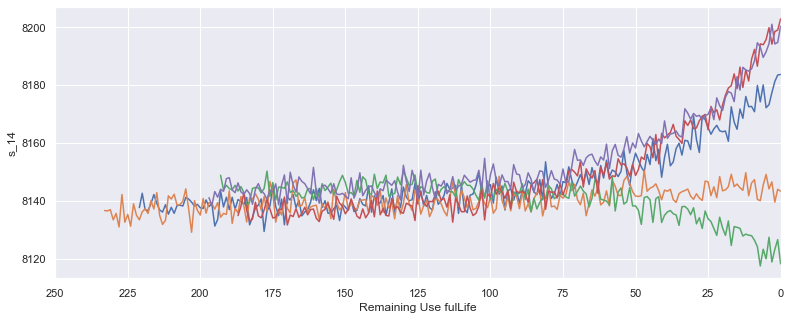

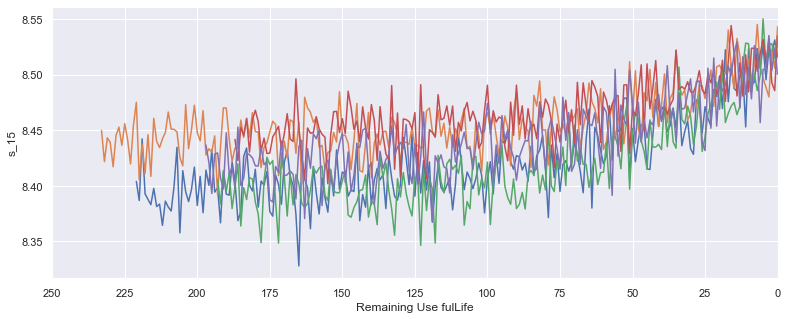

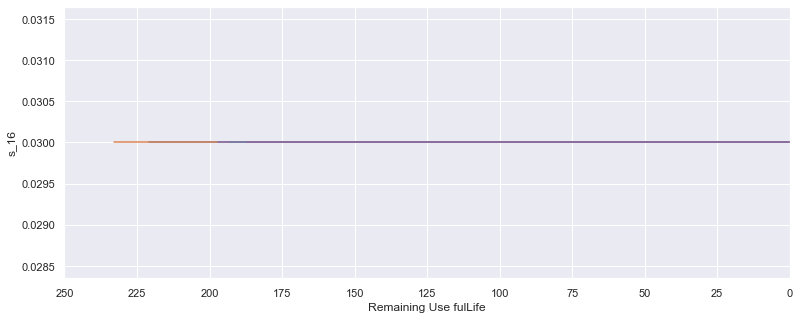

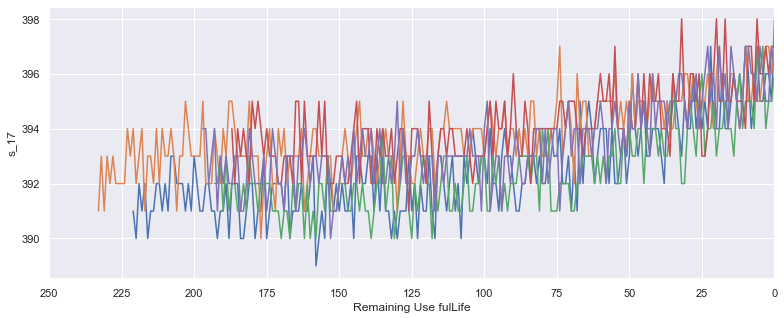

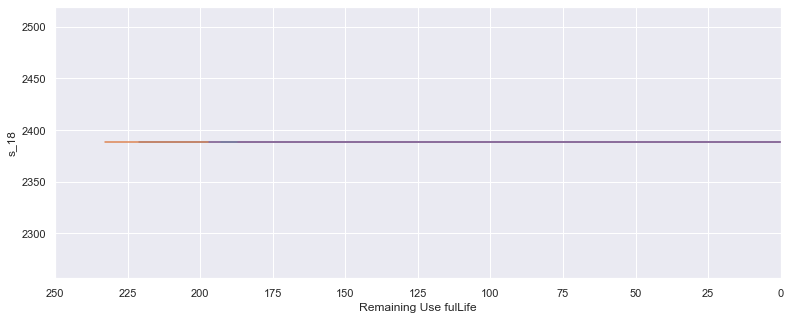

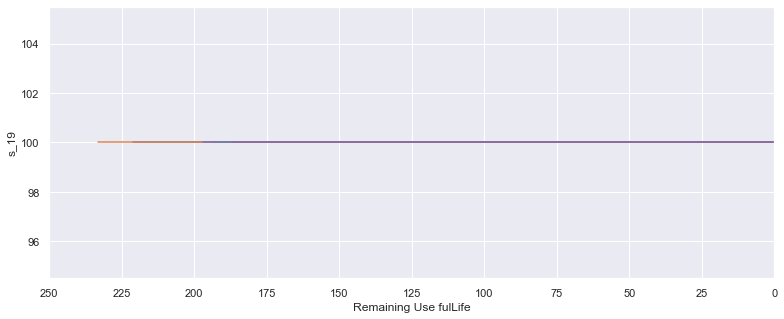

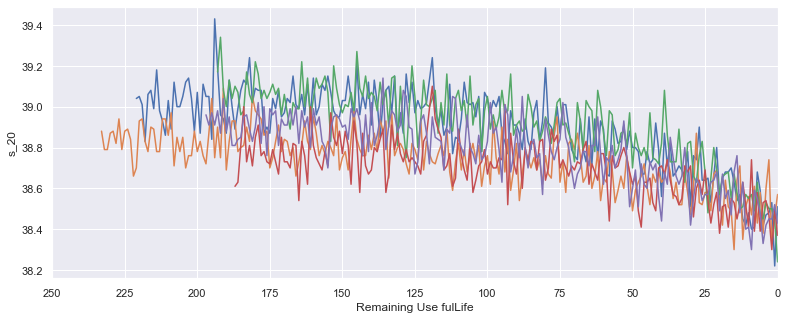

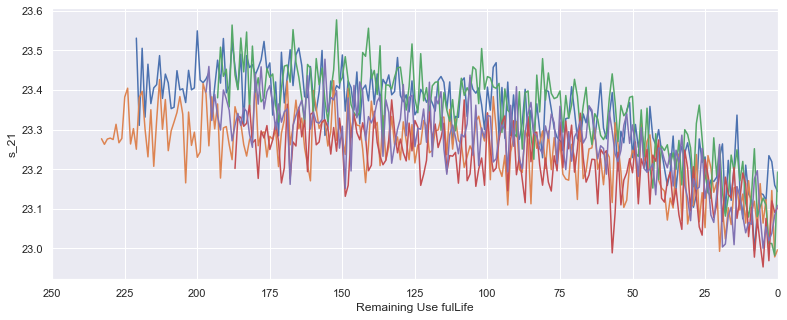

In [13]:

for sensor_name in sensor_names:
    plot_sensor(sensor_name)

In [14]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [15]:
drop_sensors = ['s_1','s_5','s_10','s_16','s_18','s_19']
drop_labels = index_names+setting_names+drop_sensors

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

# Since the true RUL values for the test set are only provided for the last time cycle of each enginge, 
# the test set is subsetted to represent the same
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)



# SVM

In [16]:
#SVR
from sklearn.svm import SVR

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)

# predict and evaluate
y_hat_train = svr.predict(X_train_scaled)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_scaled)
evaluate(y_test, y_hat_test)

train set RMSE:36.46736322530727, R2:0.6575992855620445
test set RMSE:32.1903699676448, R2:-1.1727332019077585


In [17]:
res_train = y_train - y_hat_train
res_test = y_test - y_hat_test


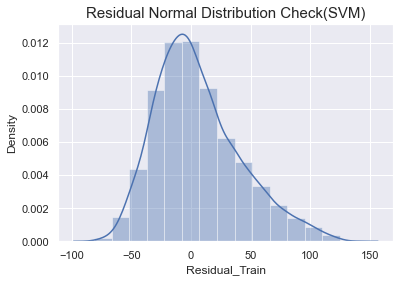

In [18]:
fig = plt.figure()
sns.distplot(res_train, bins = 15, kde=True)
plt.title('Residual Normal Distribution Check(SVM)', fontsize = 15)
plt.xlabel('Residual_Train', fontsize = 12)
plt.show()

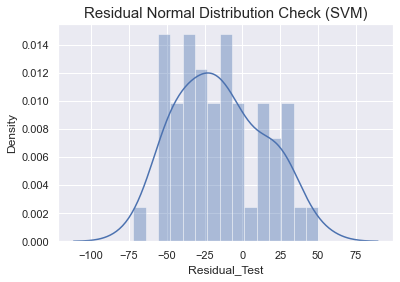

In [19]:
fig = plt.figure()
sns.distplot(res_test, bins = 15, kde=True)
plt.title('Residual Normal Distribution Check (SVM)', fontsize = 15)
plt.xlabel('Residual_Test', fontsize = 12)
plt.show()

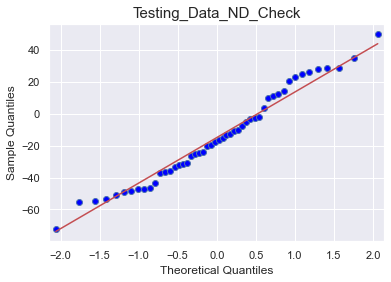

In [20]:
sm.qqplot(res_test, line ='s')
plt.title('Testing_Data_ND_Check', fontsize=15)
plt.show()

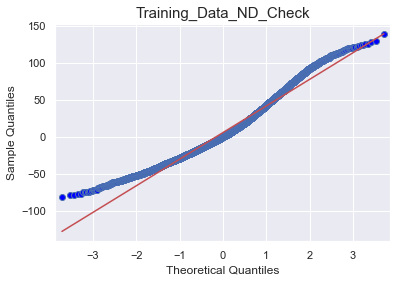

In [21]:
sm.qqplot(res_train, line ='s')
plt.title('Training_Data_ND_Check', fontsize=15)
plt.show()

# Restructured SVm

In [22]:
# # Scaling

y_train_clipped = y_train.clip(upper=100)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM regression + clipped RUL + scaled
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train_scaled)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_scaled)
evaluate(y_test, y_hat_test)

train set RMSE:15.244434018322625, R2:0.7803387605107351
test set RMSE:25.493582262672142, R2:-0.3627500138044779


In [23]:
res_train = y_train - y_hat_train
res_test = y_test - y_hat_test


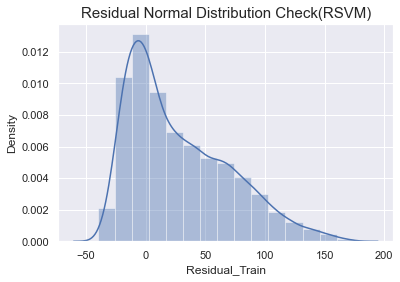

In [28]:
fig = plt.figure()
sns.distplot(res_train, bins = 15, kde=True)
plt.title('Residual Normal Distribution Check(RSVM)', fontsize = 15)
plt.xlabel('Residual_Train', fontsize = 12)
plt.show()

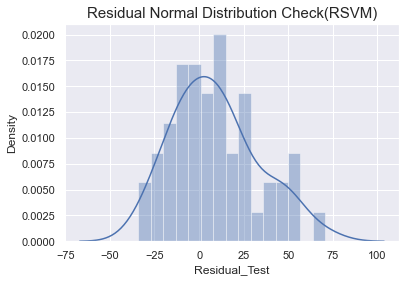

In [25]:
fig = plt.figure()
sns.distplot(res_test, bins = 15, kde=True)
plt.title('Residual Normal Distribution Check(RSVM)', fontsize = 15)
plt.xlabel('Residual_Test', fontsize = 12)
plt.show()

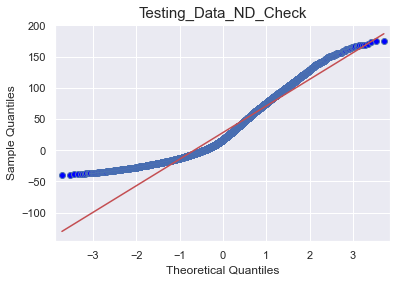

In [26]:
sm.qqplot(res_train, line ='s')
plt.title('Testing_Data_ND_Check', fontsize=15)
plt.show()

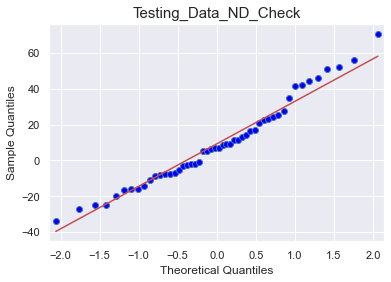

In [27]:
sm.qqplot(res_test, line ='s')
plt.title('Testing_Data_ND_Check', fontsize=15)
plt.show()